# Iris Data Experiments

This notebook runs the experiments and generates the figures on the [Iris data set](https://archive.ics.uci.edu/ml/datasets/iris). 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import warnings

# our code packaged for easy use
import detect_simpsons_paradox as dsp


In [3]:
iris_df = pd.read_csv('../data/iris.csv')
iris_df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


From examining the above, we know that the class is the group-by variables and the float type variables are the continuous attributes. First we select the columns accordingly and output the names of the selected columns of each type to verify.

In [4]:
groupbyAttrs = iris_df.select_dtypes(include=['object'])
groupbyAttrs_labels = list(groupbyAttrs)
print(groupbyAttrs_labels)

['class']


In [5]:
continuousAttrs = iris_df.select_dtypes(include=['float64'])
continuousAttrs_labels = list(continuousAttrs)
print(continuousAttrs_labels)

['sepal length', 'sepal width', 'petal length', 'petal width']


Now we can run our algorithm and print out the results after a little bit of post-processing to improve readability.

In [6]:
# run detection algorithm
result_df = dsp.detect_simpsons_paradox(iris_df)

# Map attribute index to attribute name
result_df['attr1'] = result_df['attr1'].map(lambda x:continuousAttrs_labels[x])
result_df['attr2'] = result_df['attr2'].map(lambda x:continuousAttrs_labels[x])
# sort for easy reading
result_df = result_df.sort_values(['attr1', 'attr2'], ascending=[1, 1])

result_df

,allCorr,attr1,attr2,reverseCorr,groupbyAttr,subgroup
0,-0.109369,sepal length,sepal width,0.746780,class,Iris-setosa
3,-0.109369,sepal length,sepal width,0.525911,class,Iris-versicolor
6,-0.109369,sepal length,sepal width,0.457228,class,Iris-virginica
1,-0.420516,sepal width,petal length,0.176695,class,Iris-setosa
4,-0.420516,sepal width,petal length,0.560522,class,Iris-versicolor
7,-0.420516,sepal width,petal length,0.401045,class,Iris-virginica
2,-0.356544,sepal width,petal width,0.279973,class,Iris-setosa
5,-0.356544,sepal width,petal width,0.663999,class,Iris-versicolor
8,-0.356544,sepal width,petal width,0.537728,class,Iris-virginica


# Plotting

We plot all data in scatter plots based on each group by attribute, for each pair of candidate attributes. For each plot we add the overall trendline and the trend line for each occurence of Simpson's Paradox. 

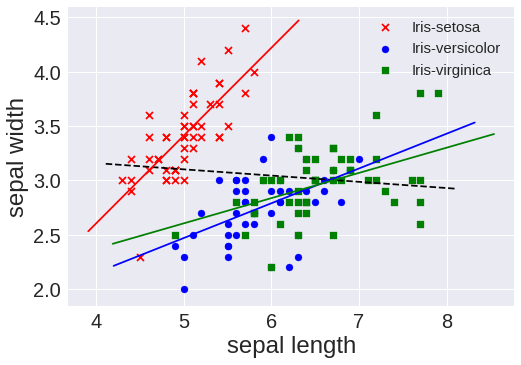

In [7]:
fig = plt.figure()
font = {'weight':'normal'}
plt.rc('font', **font)
colors = {'Iris-setosa':'red', 'Iris-versicolor':'blue', 'Iris-virginica':'green'}
markers = {'Iris-setosa':'x', 'Iris-versicolor':'o', 'Iris-virginica':'s'}

for i in range(len(iris_df['sepal length'])):
    plt.scatter(iris_df['sepal length'][i], iris_df['sepal width'][i],c=colors[iris_df['class'][i]], marker=markers[iris_df['class'][i]], label=iris_df['class'][i])


plt.xlabel('sepal length',  fontsize=24)
plt.ylabel('sepal width', fontsize=24)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

import matplotlib.patches as mpatches
from collections import OrderedDict
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), prop={'size':15})

# Add correlation line
axes = plt.gca()
x = iris_df['sepal length']
y = iris_df['sepal width']

m, b = np.polyfit(x, y, 1)
X_plot = np.linspace(axes.get_xlim()[0],axes.get_xlim()[1],100)
plt.plot(X_plot, m*X_plot + b, '--',color='black')

setosa = iris_df[iris_df['class'] =='Iris-setosa']
versicolor = iris_df[iris_df['class'] =='Iris-versicolor']
virginica = iris_df[iris_df['class'] =='Iris-virginica']
x1 = setosa['sepal length']
y1 = setosa['sepal width']

m1, b1 = np.polyfit(x1, y1, 1)
X_plot1 = np.linspace(axes.get_xlim()[0],axes.get_xlim()[1]-2,100)
plt.plot(X_plot1, m1*X_plot1 + b1, '-', color='red')

x2 = versicolor['sepal length']
y2 = versicolor['sepal width']

m, b = np.polyfit(x2, y2, 1)
X_plot = np.linspace(axes.get_xlim()[0]+0.5,axes.get_xlim()[1],100)
plt.plot(X_plot, m*X_plot + b, '-', color='blue')

x3 = virginica['sepal length']
y3 = virginica['sepal width']

m, b = np.polyfit(x3, y3, 1)
X_plot = np.linspace(axes.get_xlim()[0]+0.5,axes.get_xlim()[1],100)
plt.plot(X_plot, m*X_plot + b, '-', color='green')

plt.show()

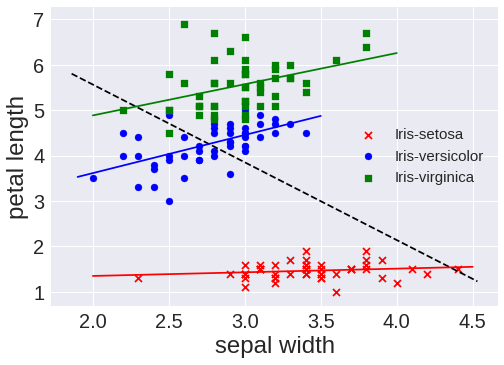

In [8]:
fig = plt.figure()
colors = {'Iris-setosa':'red', 'Iris-versicolor':'blue', 'Iris-virginica':'green'}
markers = {'Iris-setosa':'x', 'Iris-versicolor':'o', 'Iris-virginica':'s'}

for i in range(len(iris_df['sepal width'])):
    plt.scatter(iris_df['sepal width'][i], iris_df['petal length'][i],c=colors[iris_df['class'][i]], marker=markers[iris_df['class'][i]], label=iris_df['class'][i])

plt.xlabel('sepal width',  fontsize=24)
plt.ylabel('petal length', fontsize=24)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

from collections import OrderedDict
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), prop={'size':15})

# Add correlation line
axes = plt.gca()
x = iris_df['sepal width']
y = iris_df['petal length']

m, b = np.polyfit(x, y, 1)
X_plot = np.linspace(axes.get_xlim()[0],axes.get_xlim()[1],100)
plt.plot(X_plot, m*X_plot + b, '--',color='black')

setosa = iris_df[iris_df['class'] =='Iris-setosa']
versicolor = iris_df[iris_df['class'] =='Iris-versicolor']
virginica = iris_df[iris_df['class'] =='Iris-virginica']
x1 = setosa['sepal width']
y1 = setosa['petal length']

m1, b1 = np.polyfit(x1, y1, 1)
X_plot1 = np.linspace(2,4.5,100)
plt.plot(X_plot1, m1*X_plot1 + b1, '-', color='red')

x2 = versicolor['sepal width']
y2 = versicolor['petal length']

m, b = np.polyfit(x2, y2, 1)

X_plot = np.linspace(1.9,3.5,100)
plt.plot(X_plot, m*X_plot + b, '-', color='blue')

x3 = virginica['sepal width']
y3 = virginica['petal length']

m, b = np.polyfit(x3, y3, 1)
X_plot = np.linspace(2,4,100)
plt.plot(X_plot, m*X_plot + b, '-', color='green')

plt.show()

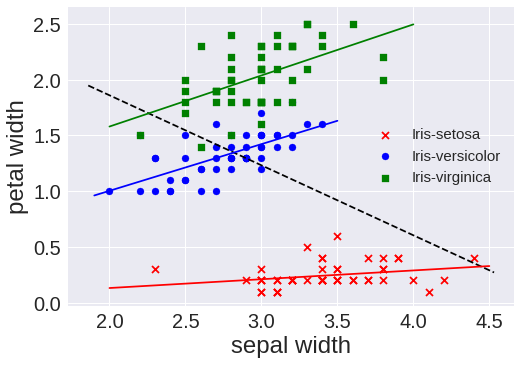

In [9]:
fig = plt.figure()
colors = {'Iris-setosa':'red', 'Iris-versicolor':'blue', 'Iris-virginica':'green'}
markers = {'Iris-setosa':'x', 'Iris-versicolor':'o', 'Iris-virginica':'s'}

for i in range(len(iris_df['sepal width'])):
    test = plt.scatter(iris_df['sepal width'][i], iris_df['petal width'][i],c=colors[iris_df['class'][i]], marker=markers[iris_df['class'][i]], label=iris_df['class'][i])

plt.xlabel('sepal width',  fontsize=24)
plt.ylabel('petal width', fontsize=24)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

from collections import OrderedDict
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), prop={'size':15})

# Add correlation line
axes = plt.gca()
x = iris_df['sepal width']
y = iris_df['petal width']

m, b = np.polyfit(x, y, 1)
X_plot = np.linspace(axes.get_xlim()[0],axes.get_xlim()[1],100)
plt.plot(X_plot, m*X_plot + b, '--',color='black')

setosa = iris_df[iris_df['class'] =='Iris-setosa']
versicolor = iris_df[iris_df['class'] =='Iris-versicolor']
virginica = iris_df[iris_df['class'] =='Iris-virginica']
x1 = setosa['sepal width']
y1 = setosa['petal width']

m1, b1 = np.polyfit(x1, y1, 1)
X_plot1 = np.linspace(2,4.5,100)
plt.plot(X_plot1, m1*X_plot1 + b1, '-', color='red')

x2 = versicolor['sepal width']
y2 = versicolor['petal width']

m, b = np.polyfit(x2, y2, 1)

X_plot = np.linspace(1.9,3.5,100)
plt.plot(X_plot, m*X_plot + b, '-', color='blue')

x3 = virginica['sepal width']
y3 = virginica['petal width']

m, b = np.polyfit(x3, y3, 1)
X_plot = np.linspace(2,4,100)
plt.plot(X_plot, m*X_plot + b, '-', color='green')

plt.show()

# Experiments on sampled data
We run our algorithm on 10%, 30%, 50%, 60%, 90% sampled data set and print out the results.

In [14]:
import random
# sample 0.1

portions = [.1,.3, .5, .6, .9]

# for sampling
rows = []
iris_df_portion = []
res_df = []

for i,p in enumerate(portions):
    rows.append(random.sample(list(iris_df.index), int(len(iris_df)*p)))
    iris_df_portion.append(iris_df.loc[rows[i]])
    res_df.append( dsp.detect_simpsons_paradox(iris_df_portion[i]))
    

In [13]:
iris_df.index

RangeIndex(start=0, stop=150, step=1)

In [22]:
# for outputting all alone variables
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


for p,tab in zip(portions, res_df):
    print('SP Detections in ' + str(p*100) + '% of the data')
    tab

SP Detections in 10.0% of the data


,allCorr,attr1,attr2,reverseCorr,groupbyAttr,subgroup
0,-0.165623,0,1,0.416705,class,Iris-setosa
1,0.894290,0,3,NaN,class,Iris-setosa
2,-0.178854,1,3,NaN,class,Iris-setosa
3,0.974820,2,3,NaN,class,Iris-setosa
4,-0.165623,0,1,0.534071,class,Iris-versicolor
5,-0.328170,1,2,0.886920,class,Iris-versicolor
6,-0.178854,1,3,0.861858,class,Iris-versicolor
7,-0.165623,0,1,0.090021,class,Iris-virginica
8,-0.328170,1,2,0.161819,class,Iris-virginica
9,-0.178854,1,3,0.851688,class,Iris-virginica


SP Detections in 30.0% of the data


,allCorr,attr1,attr2,reverseCorr,groupbyAttr,subgroup
0,-0.252348,0,1,0.253872,class,Iris-setosa
1,-0.252348,0,1,0.421605,class,Iris-versicolor
2,-0.471543,1,2,0.453772,class,Iris-versicolor
3,-0.353459,1,3,0.490119,class,Iris-versicolor
4,-0.353459,1,3,0.445029,class,Iris-virginica


SP Detections in 50.0% of the data


,allCorr,attr1,attr2,reverseCorr,groupbyAttr,subgroup
0,-0.061169,0,1,0.751555,class,Iris-setosa
1,-0.350865,1,3,0.251056,class,Iris-setosa
2,-0.061169,0,1,0.546027,class,Iris-versicolor
3,-0.424396,1,2,0.498380,class,Iris-versicolor
4,-0.350865,1,3,0.590920,class,Iris-versicolor
5,-0.061169,0,1,0.582588,class,Iris-virginica
6,-0.424396,1,2,0.491255,class,Iris-virginica
7,-0.350865,1,3,0.442125,class,Iris-virginica


SP Detections in 60.0% of the data


,allCorr,attr1,attr2,reverseCorr,groupbyAttr,subgroup
0,-0.134016,0,1,0.783969,class,Iris-setosa
1,-0.419081,1,2,0.298338,class,Iris-setosa
2,-0.390097,1,3,0.160843,class,Iris-setosa
3,-0.134016,0,1,0.539898,class,Iris-versicolor
4,-0.419081,1,2,0.448555,class,Iris-versicolor
5,-0.390097,1,3,0.576094,class,Iris-versicolor
6,-0.134016,0,1,0.447124,class,Iris-virginica
7,-0.419081,1,2,0.344330,class,Iris-virginica
8,-0.390097,1,3,0.388474,class,Iris-virginica


SP Detections in 90.0% of the data


,allCorr,attr1,attr2,reverseCorr,groupbyAttr,subgroup
0,-0.112816,0,1,0.746780,class,Iris-setosa
1,-0.424198,1,2,0.176695,class,Iris-setosa
2,-0.361556,1,3,0.279973,class,Iris-setosa
3,-0.112816,0,1,0.456305,class,Iris-versicolor
4,-0.424198,1,2,0.564720,class,Iris-versicolor
5,-0.361556,1,3,0.636601,class,Iris-versicolor
6,-0.112816,0,1,0.461508,class,Iris-virginica
7,-0.424198,1,2,0.402582,class,Iris-virginica
8,-0.361556,1,3,0.558692,class,Iris-virginica
